Epoch 1/10
1875/1875 [==============================] - 58s 30ms/step - loss: 0.1450 - accuracy: 0.9539 - val_loss: 0.0444 - val_accuracy: 0.9859
Epoch 2/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0451 - accuracy: 0.9861 - val_loss: 0.0360 - val_accuracy: 0.9885
Epoch 3/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0326 - accuracy: 0.9895 - val_loss: 0.0321 - val_accuracy: 0.9899
Epoch 4/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0241 - accuracy: 0.9927 - val_loss: 0.0299 - val_accuracy: 0.9915
Epoch 5/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0204 - accuracy: 0.9934 - val_loss: 0.0252 - val_accuracy: 0.9921
Epoch 6/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0157 - accuracy: 0.9952 - val_loss: 0.0369 - val_accuracy: 0.9904
Epoch 7/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0132 - accuracy: 0.9957 - val_loss: 0.0292 -

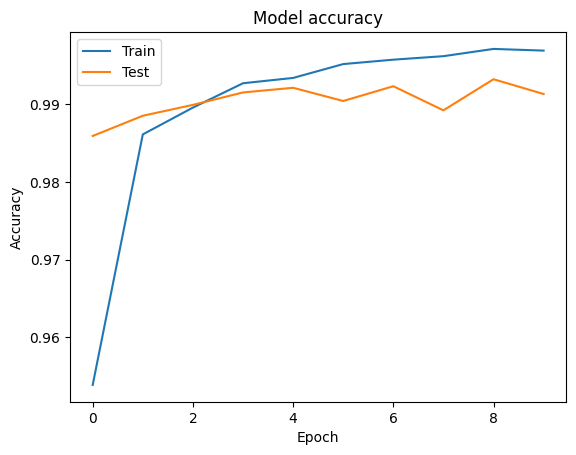

313/313 [==============================] - 3s 8ms/step
Predicted label: 2, Actual label: 2


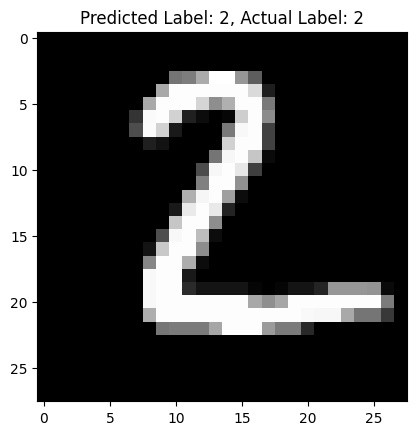

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the data

# Step 2: Build the model
model = models.Sequential([
    layers.Reshape(target_shape=(28, 28, 1), input_shape=(28, 28)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 classes for digits 0-9
])

# Step 3: Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Step 5: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Optional: Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Step 6: Make predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

# Example of predicting the label of the first image in the test set
predicted_label = np.argmax(predictions[1])
print(f'Predicted label: {predicted_label}, Actual label: {y_test[1]}')

# If you want to see the digit
plt.imshow(x_test[1], cmap='gray')
plt.title(f'Predicted Label: {predicted_label}, Actual Label: {y_test[1]}')
plt.show()
